In [1]:
%load_ext autoreload
%autoreload 2

# Experiments with TEASER-EASE model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.teaser_ease import TEASER_EASE

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/Publiq/')
# DATA_DIR = Path('../../data/ML20M/')
DATA_DIR = Path('../../data/Amazon Video Games/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = TEASER_EASE

L2_EASE = 100
L2_1 = 500
L2_2 = 2000
RHO = 10000
DELTA = 0
MAX_ITER = 15
HYPERPARAMS = {'l2_ease': L2_EASE, 'l2_1': L2_1, 'l2_2': L2_2, 'rho': RHO, 'delta': DELTA,'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2_ease': 100,
 'l2_1': 500,
 'l2_2': 2000,
 'rho': 10000,
 'delta': 0,
 'max_iterations': 15}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Evaluate model on test set

In [8]:
%%time
alg = ALG(**HYPERPARAMS)
alg.fit(X, S)

Decompose XTX
Decompose DTD


norm E 0.253489393704723
diag norm: 0.8575472148422155
diag_diff: 0.511456433984209

norm E 0.17392517757595807
diag norm: 0.29925839964444817
diag_diff: 0.04953648793492835
rho * change E: 1475.1886653801132

norm E 0.16605636072742735
diag norm: 0.1305093930865741
diag_diff: 0.09701378895593774
rho * change E: 363.8201257012928

norm E 0.16419952575156857
diag norm: 0.07350355030016946
diag_diff: 0.08056799194871422
rho * change E: 124.73397733580134

norm E 0.1633623818240829
diag norm: 0.05663772841282956
diag_diff: 0.05494722781312752
rho * change E: 55.3692874706024

norm E 0.16282873990052224
diag norm: 0.052960057036102653
diag_diff: 0.03544001774553985
rho * change E: 40.18396862331847

norm E 0.1624655466348306
diag norm: 0.05358607000080215
diag_diff: 0.02465647901941024
rho * change E: 45.14014669489866

norm E 0.16224500885773976
diag norm: 0.06088839919520239
diag_diff: 0.024719845736312543
rho * change E: 68.6474465248825

norm E 0.1620818484560326
diag norm: 0.062466325

In [9]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 2000 users
Average Recall@20 0.189
Average Recall@100 0.366
Average nDCG@100 0.132


## Plot amount of items from long tail recommended

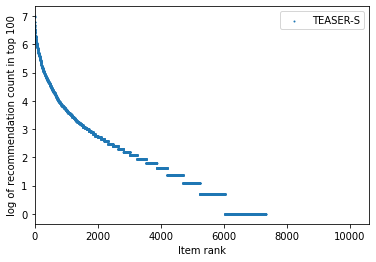

In [10]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["TEASER-S"], k=100)